<a href="https://colab.research.google.com/github/jrjradler/twittersentimentmk1/blob/main/LiveDataTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import lib
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
import os
import tweepy
import pandas as pd
plt.style.use('fivethirtyeight')

In [5]:
# use os.environ.get to obtain other environment variables
# from ~/.bashrc or ~/.zshrc etc., so they aren't in your code
consumer_key = os.environ.get('c_key')
#Replace # with your keys
consumer_key = '#' 
consumer_secret = '#'
access_token = '#'
access_token_secret = '#'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

crypto = (input("What currency do you want to invest in? \n"))
filter = ' -giveaway -airdrop -send -doge -ether -give -free -ripple -litecoin -download -bitmart -RT -amp'

results = api.search(q=(crypto+filter), lang ="en", count=100)

print("Show the 5 recent tweets:\n")
i=1
for tweet in results[:7]:
    print(str(i) +') '+ tweet.text + '\n')
    i= i+1



What currency do you want to invest in? 
Bitcoin
Show the 5 recent tweets:

1) People not investing in Bitcoin anymore? #Bitcoin

2) Proud owner of 1 #Bitcoin https://t.co/0o4M5YPO7h

3) @proceso For all those who are new to this working from home Bitcoin trading options 

Here's a little tip:

Get a… https://t.co/yUeRVbKrIG

4) @WSJ The next bitcoin?🤔🤔🤔🙃

5) @outsiderid @Guribelima1406 @tocaproguip @monark So n votar 
Buy and hold #Bitcoin

6) @StopTheCriminal @rocky0413 If you are interested... I can help you earn that amazing profit you desire because I u… https://t.co/b1ALwXzdE7

7) askST: Is it safe to invest in cryptocurrencies like bitcoin? And what are NFTs?, Tech News News &amp; Top Stories - Th… https://t.co/xdjVCGtebR



In [12]:
df = pd.DataFrame([tweet.text for tweet in results], columns=['Tweets'])
# Show the first 5 rows of data
len(df)
df.head()

,Tweets
0,People not investing in Bitcoin anymore? #Bitcoin
1,Proud owner of 1 #Bitcoin https://t.co/0o4M5YPO7h
2,@proceso For all those who are new to this wor...
3,@WSJ The next bitcoin?🤔🤔🤔🙃
4,@outsiderid @Guribelima1406 @tocaproguip @mona...


In [11]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub('\r\n|\n|\r/gm', '', text)
 text = re.sub('@', '', text)
 text = re.sub(':', '', text)
 
 return text

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df['Tweets'] = df['Tweets'].apply(deEmojify)

# Show the cleaned tweets
df

,Tweets
0,People not investing in Bitcoin anymore? Bitcoin
1,Proud owner of 1 Bitcoin
2,For all those who are new to this working fro...
3,The next bitcoin?🤔🤔🤔
4,1406 So n votar Buy and hold Bitcoin
...,...
95,"there*. and moreover, Its not good for the w..."
96,_RAIL we Illinois folk is scurred of dem supr...
97,The Bank of America Fund Manager Survey for Ap...
98,Bitcoin


In [8]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df
#Subjectivity < 1  but > 0 is more factual, > 1 is very opinionated (0 and +1 are maxes)
#Polarity < 0 is more negative, > 0 is more positive (-1 and +1 are the maxes)

,Tweets,Subjectivity,Polarity
0,People not investing in Bitcoin anymore? Bitcoin,0.000000,0.000000
1,Proud owner of 1 Bitcoin,1.000000,0.800000
2,For all those who are new to this working fro...,0.477273,-0.025568
3,The next bitcoin?🤔🤔🤔,0.000000,0.000000
4,1406 So n votar Buy and hold Bitcoin,0.000000,0.000000
...,...,...,...
95,"there*. and moreover, Its not good for the w...",0.600000,-0.437500
96,_RAIL we Illinois folk is scurred of dem supr...,0.000000,0.000000
97,The Bank of America Fund Manager Survey for Ap...,0.100000,0.100000
98,Bitcoin,0.000000,0.000000


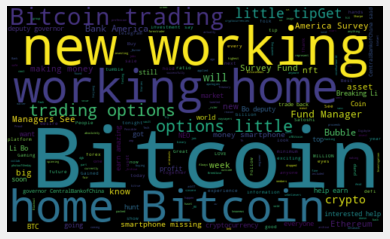

In [9]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe


In [ ]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Neutral'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

In [ ]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

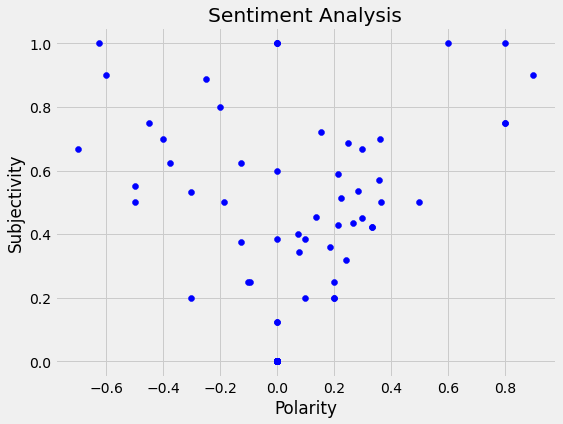

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

ptweets = round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

print(ptweets)





30.0


In [ ]:
ntweets= df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

ntweets = round( (ntweets.shape[0] / df.shape[0]) * 100 , 1)

print(ntweets)


17.0


In [ ]:
netweets= df[df.Analysis == 'Neutral']
netweets = netweets['Tweets']
netweets
round( (netweets.shape[0] / df.shape[0]) * 100 , 1)

53.0

In [ ]:
if ptweets > ntweets:
  print("Positive Sentiment")
else:
  print("Negative Sentiment")



Positive Sentiment


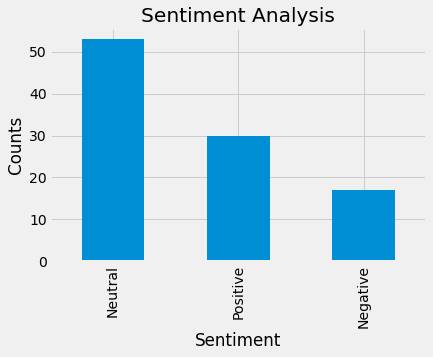

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()